In [2]:
from mnist import MNIST 
import numpy as np
from pylab import *
from matplotlib import colors
%matplotlib inline

mndata = MNIST('./data')

mndata.load_training()
img_side = 28
n_mnist_pixels = img_side*img_side

In [3]:
labels = mndata.train_labels

cluster_size = 10
train_inputs_idx = []
for idx in [0, 4]:
    label_idx = np.where(np.isin(labels,[idx]))[0][:cluster_size]
    train_inputs_idx.append(label_idx)

samples_idx = np.array(train_inputs_idx, dtype='int').flatten()
samples_idx.size

20

In [4]:
images = []
for sample_idx in samples_idx.flatten():
    images.append(mndata.train_images[sample_idx])

images = np.array(images, dtype='float')
images = images / 255
images.shape

(20, 784)

In [5]:
def simple_plot(T: list):
    T_arr = np.array(T, dtype=float)

    fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
    axs.plot(np.arange(T_arr.size), T_arr)


    plt.show()

In [6]:
from typing import Literal

def show_image(image: ndarray, cmap: Literal['bone', 'Greys'] = 'bone'):
    # figure(figsize=(15, 10))

    imshow(np.array(image),
        interpolation='none',
        aspect='equal',
        cmap=cmap,
        )

    axis("off")

    show()

In [7]:
def get_discount_matrix(size, rev = False, cor_supr_size=0):
    a = np.arange(size)
    if rev:
        a = np.abs(np.abs(a - a[np.newaxis].T) - np.max(a))
    else:
        a = np.abs(a - a[np.newaxis].T)
    np.fill_diagonal(a, 0)

    if cor_supr_size > 0:
        a[:cor_supr_size] = 0
        a[:, 0:cor_supr_size] = 0
        a[-cor_supr_size:] = 0
        a[:, -cor_supr_size:] = 0

    return a

# a = get_discount_matrix(10, rev=True, cor_supr_size=2)
# a = np.array(a, dtype='float')
# # a[:, 0:2] = 0
# print(a)
# show_image(a, cmap='Greys')

In [8]:
def show_images_table(images_2d: ndarray, img_side: int = 28, row_size=10):
    column_size = int(images.shape[0] / row_size)

    shaped_images = images_2d.reshape(column_size, row_size, img_side, img_side)
    shaped_images = shaped_images.swapaxes(1, 2).reshape(column_size*img_side, row_size*img_side)

    figure(figsize=(15, 10))

    imshow(shaped_images,
           interpolation='none',
           aspect='equal',
           cmap='bone',
           )
    
    axis("off")

# show_images_table(images_2d=images)
images.shape

(20, 784)

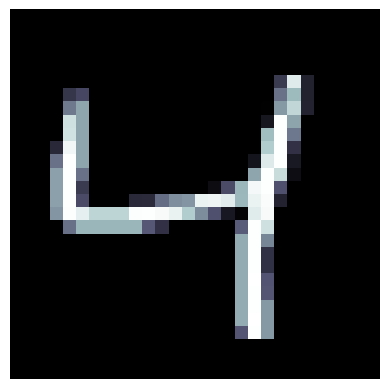

0.508313725490196
350
386
130.96050434985062


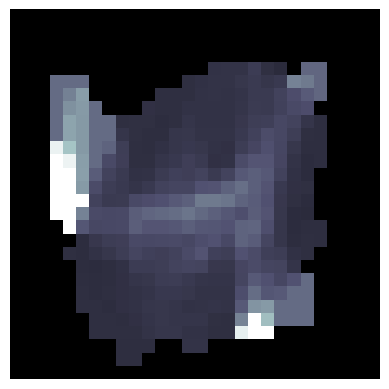

0.27142073440383546
0
36
28.36090504395913


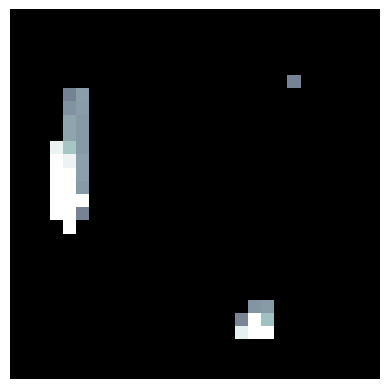

0.6302423343102029
15
36
28.301809699942645


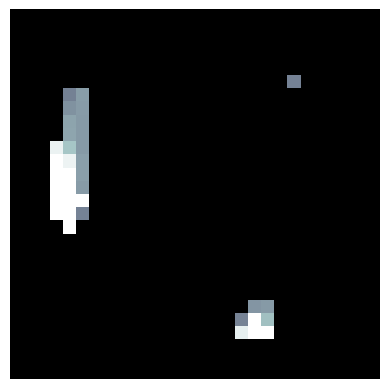

0.62892910444317
15
36
23.130683742157103


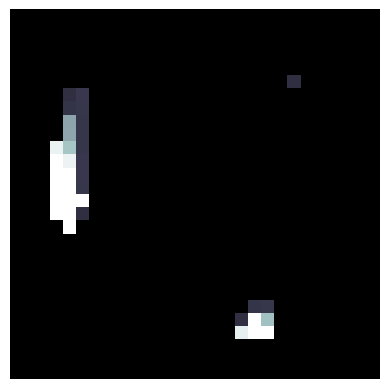

0.5140151942701578
15
36
20.872958166815426


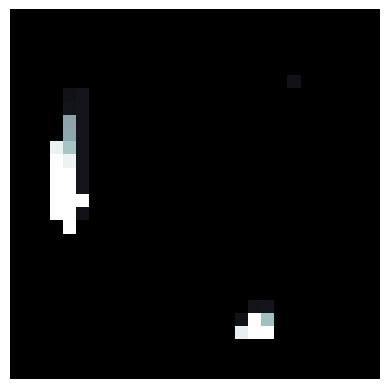

0.4638435148181206
15
36
20.092699453341876


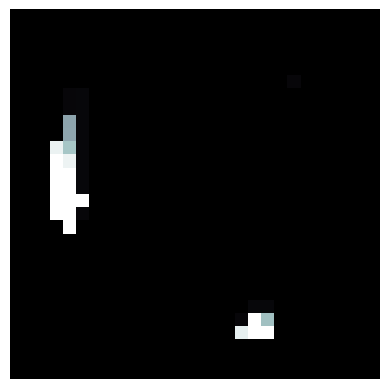

0.4465044322964862
15
36
19.833320225493015


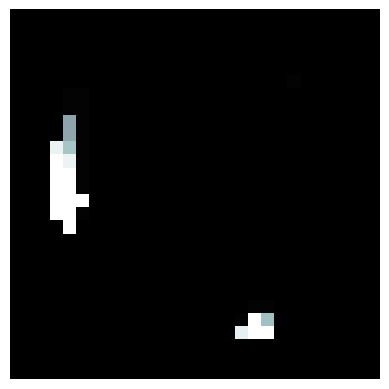

0.44074044945540036
15
36
19.73087692599854


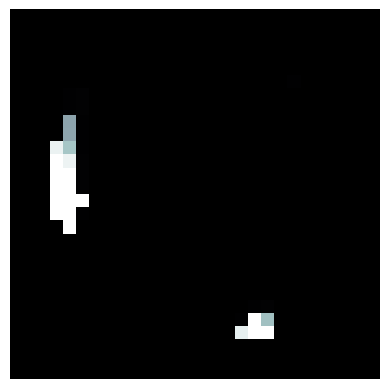

0.43846393168885656
15
36
19.679521396176483


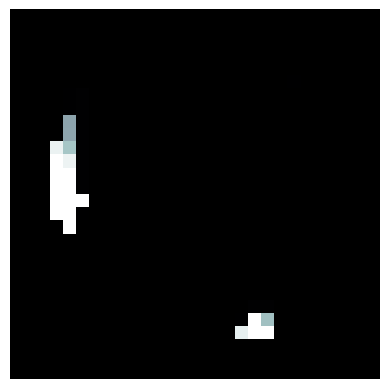

0.4373226976928106
15
36
19.649087979850258


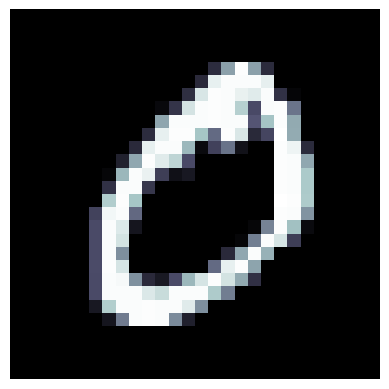

0.5542780748663102
110
386
261.8540997871753


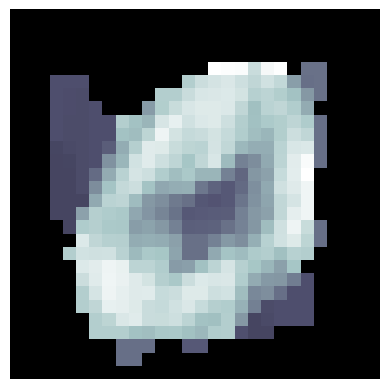

0.5427027974863735
22
297
222.94717135775113


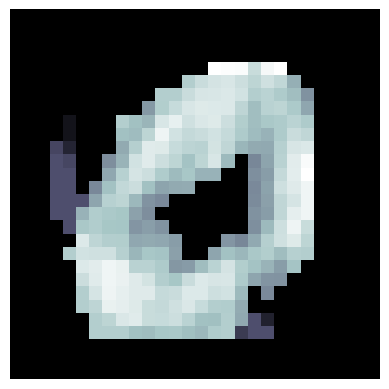

0.6005311013003398
19
275
216.21044545466023


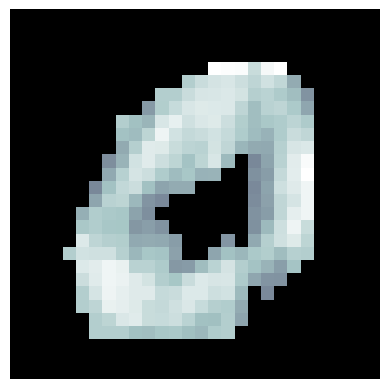

0.628975841322648
28
275
208.3341260830411


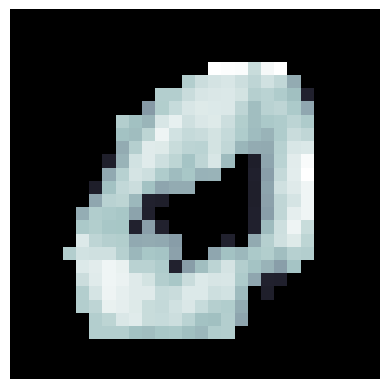

0.6060629122415742
28
275
203.7570361080455


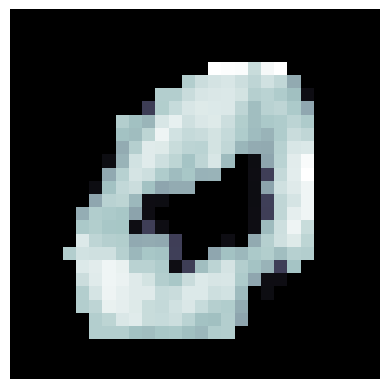

0.5927477414052233
28
275
202.12256684546452


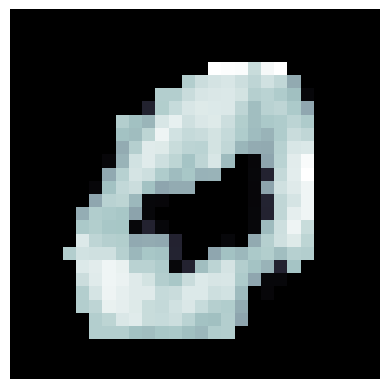

0.5879929217322605
28
275
201.36561103752683


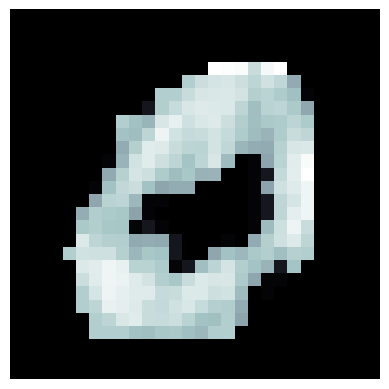

0.5857908684728054
28
275
200.95436935389307


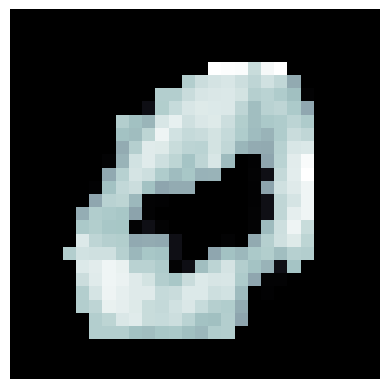

0.584594529029507
28
275
200.70620701443153


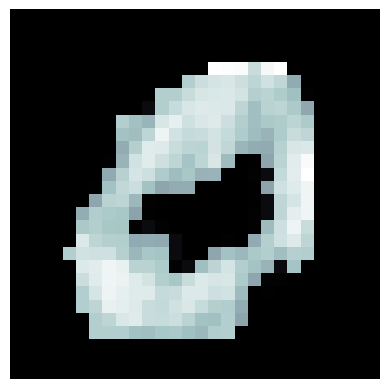

0.5838726022238009
28
275
200.54495958065718


In [11]:
I = np.zeros(n_mnist_pixels)
O = np.zeros(n_mnist_pixels)

W = np.zeros((O.size, I.size))
NW = np.zeros((O.size, I.size))

pre_train_images_idx = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14]

for img_idx in pre_train_images_idx:
    I = images[img_idx]
    W += I * I[np.newaxis].T

W /= np.sum(W, axis=1)[np.newaxis].T + 1e-30
    
W[300].sum()

# train

train_images_idx = [10, 0]

for img_idx in train_images_idx:
    I = images[img_idx]

    O = np.zeros(n_mnist_pixels)

    for iter_idx in range(10):
        show_image(image=I.reshape(img_side, img_side))

        SO = I * W
        dO = np.sum(SO, axis=1)

        O += dO

        O *= (O > 0)

        O /= np.max(O)

        # thre
        threshold = np.mean(I[I > 0]) * 0.8
        print(threshold)

        excit_mask = O > threshold
        inh_mask = np.bitwise_and(O <= threshold, O > 0)
        print(inh_mask.sum())
        print((O > 0).sum())
        print(O.sum())

        dW = I * O[np.newaxis].T
        dW *= excit_mask[np.newaxis].T
        dW *= excit_mask

        W += dW

        dW = I * O[np.newaxis].T
        dW *= inh_mask[np.newaxis].T
        dW *= excit_mask

        W -= dW

        # recur
        I = np.copy(O)
    
    # W /= np.sum(W, axis=1)[np.newaxis].T + 1e-30